In [1]:
from data.processing import DataProcessing, DataSplit
from metrics import show_metrics
import warnings
from sklearn.preprocessing import binarize
from sklearn.linear_model import LogisticRegression


warnings.filterwarnings("ignore")

In [2]:
data_processing = DataProcessing()
data = DataProcessing.get_data("/Users/mkhachatryan/Codes/Econometrics-Project/data_/weatherAUS.csv")

In [3]:

X_train, X_valid, X_test, y_train, y_valid, y_test = DataSplit().split(data)

X_train = data_processing.process(X_train)
X_valid = data_processing.process(X_valid)
X_test = data_processing.process(X_test)

_, X_valid = data_processing.scaler(X_train, X_valid)
X_train, X_test = data_processing.scaler(X_train, X_test)

y_train= data_processing.process_target(y_train )
y_valid = data_processing.process_target(y_valid)
y_test = data_processing.process_target(y_test )


In [4]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [15]:

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
y_predict_proba_valid = logreg.predict_proba(X_valid)
y_predic_valid = logreg.predict(X_valid)

Recall or Sensitivity : 0.4810
Precision : 0.7218
F-1 Score:  0.5773251139104798
ROC-AUC:  0.7143888134763803
PR-AUC:  nan


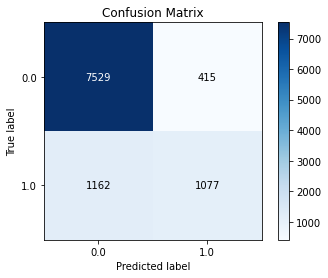

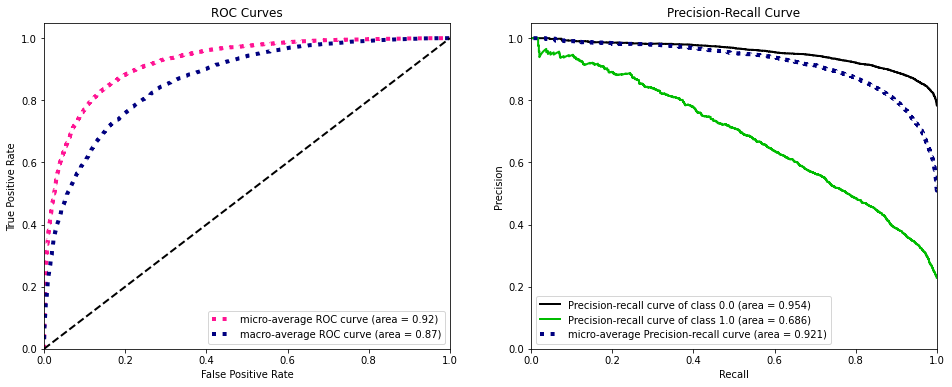

In [17]:
show_metrics(y_valid, y_predic_valid, y_predict_proba_valid)

# Changing Treshold

**************************************************
Results with threshold 0.1
Recall or Sensitivity : 0.9084
Precision : 0.3813
F-1 Score:  0.5371715304370792
ROC-AUC:  0.7465167067192544
PR-AUC:  nan


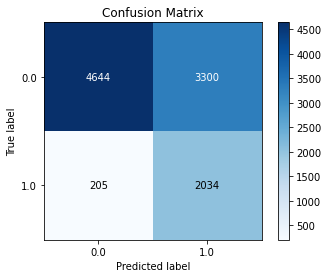

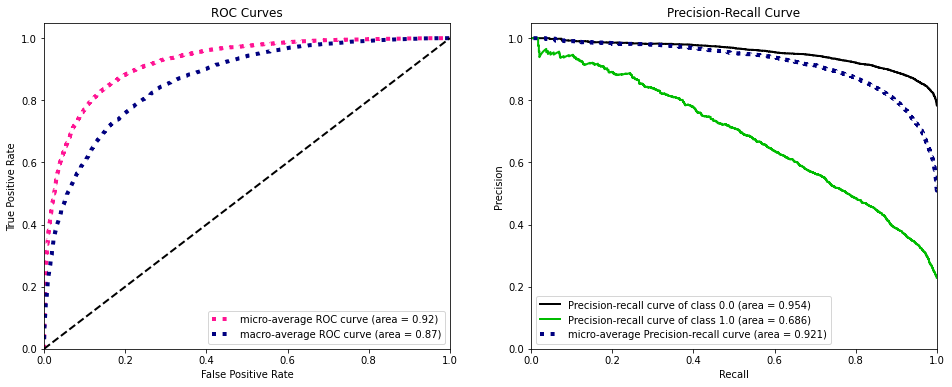

**************************************************
**************************************************
Results with threshold 0.2
Recall or Sensitivity : 0.7883
Precision : 0.4923
F-1 Score:  0.6061126373626374
ROC-AUC:  0.779597310696987
PR-AUC:  nan


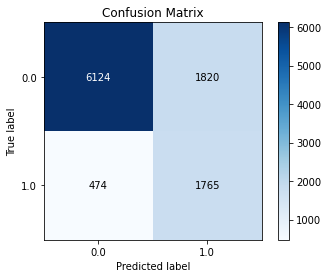

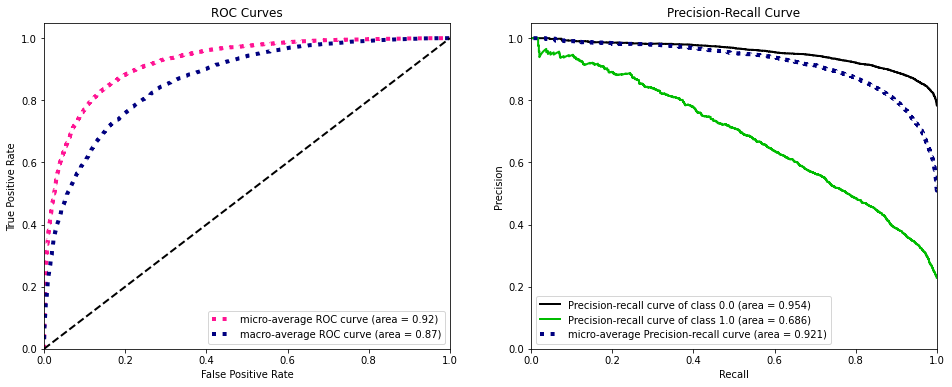

**************************************************
**************************************************
Results with threshold 0.3
Recall or Sensitivity : 0.6731
Precision : 0.5814
F-1 Score:  0.6238873939143034
ROC-AUC:  0.7682436333027035
PR-AUC:  nan


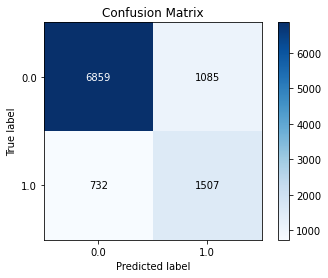

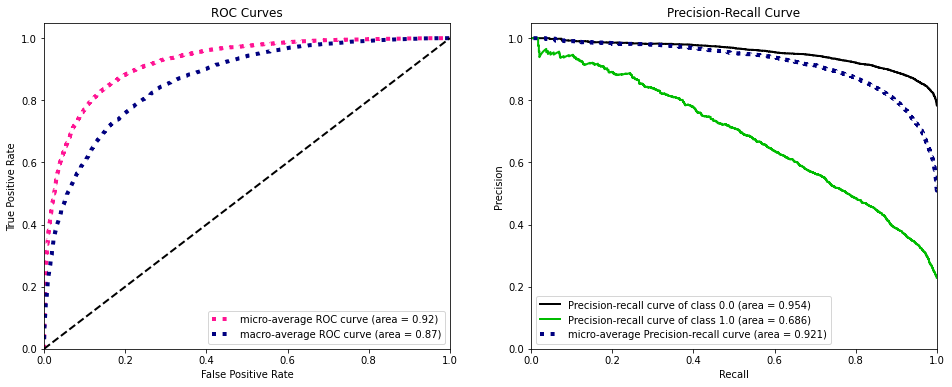

**************************************************
**************************************************
Results with threshold 0.4
Recall or Sensitivity : 0.5811
Precision : 0.6538
F-1 Score:  0.6152754788366044
ROC-AUC:  0.7471654248340437
PR-AUC:  nan


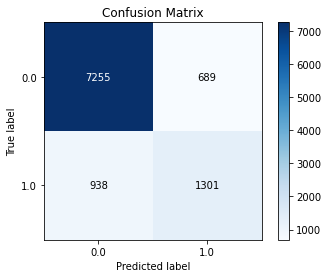

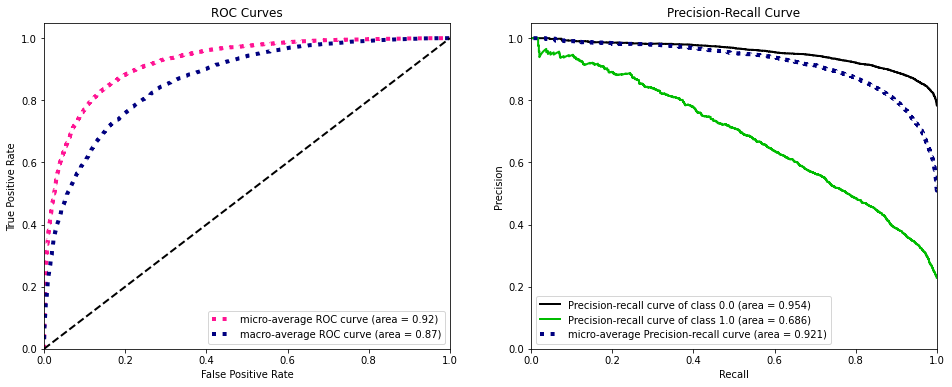

**************************************************


In [18]:

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_valid)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)


    print ("*"*50)
    print(f"Results with threshold {i/10}")
    show_metrics(y_valid, y_pred2, logreg.predict_proba(X_valid))
    print ("*"*50)

# Grid Search

In [5]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 5,
                           verbose=1)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [0.1, 1, 10, 100]}],
             scoring='roc_auc', verbose=1)

In [6]:
print('\n\nEstimator that was chosen by the search :','\n\n', grid_search.best_estimator_)



Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [7]:
best_model = LogisticRegression(**grid_search.best_params_, solver="liblinear")

In [8]:
best_model.fit(X_train, y_train)

LogisticRegression(C=100, solver='liblinear')

In [9]:
y_predict_best_proba_valid = best_model.predict_proba(X_valid)
y_predic_best_valid = best_model.predict(X_valid)

Recall or Sensitivity : 0.4824
Precision : 0.7229
F-1 Score:  0.5786230913474417
ROC-AUC:  0.7151216959988341
PR-AUC:  nan


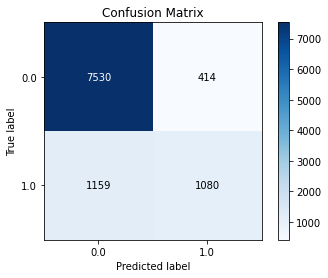

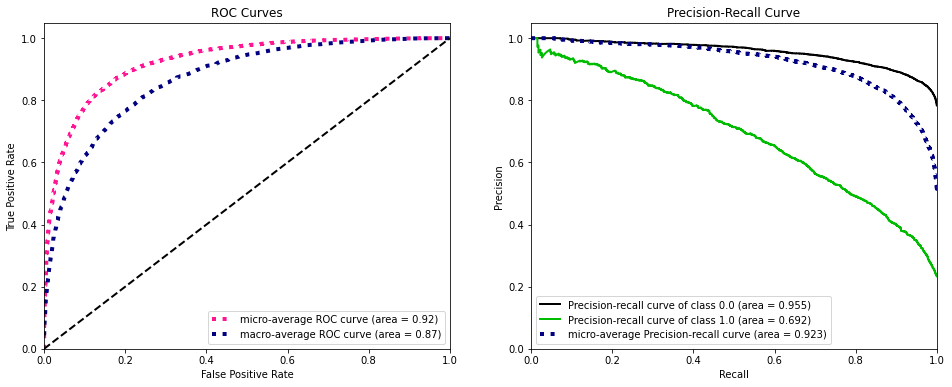

In [11]:
show_metrics(y_valid, y_predic_best_valid, y_predict_best_proba_valid)

# Thresholds

**************************************************
Results with threshold 1
Recall or Sensitivity : 0.9116
Precision : 0.3866
F-1 Score:  0.5428913419337678
ROC-AUC:  0.7519192802048462
PR-AUC:  nan


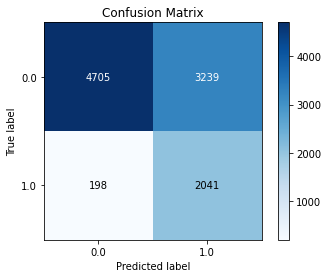

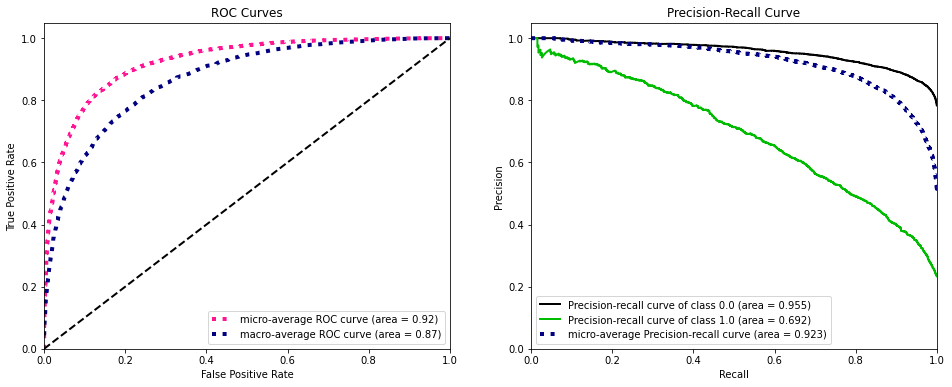

**************************************************
**************************************************
Results with threshold 2
Recall or Sensitivity : 0.7892
Precision : 0.4969
F-1 Score:  0.6098360655737705
ROC-AUC:  0.7819950967626446
PR-AUC:  nan


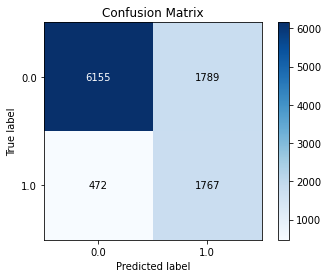

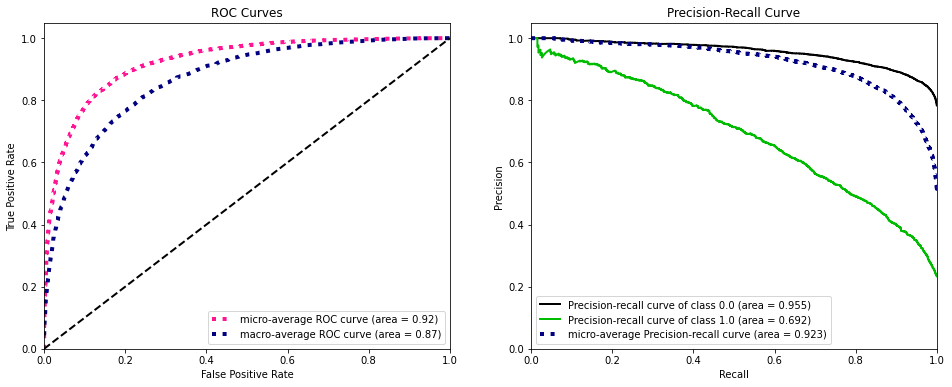

**************************************************
**************************************************
Results with threshold 3
Recall or Sensitivity : 0.6824
Precision : 0.5870
F-1 Score:  0.631144155307724
ROC-AUC:  0.7735626327121471
PR-AUC:  nan


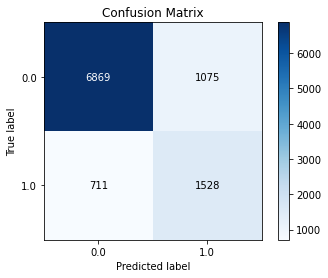

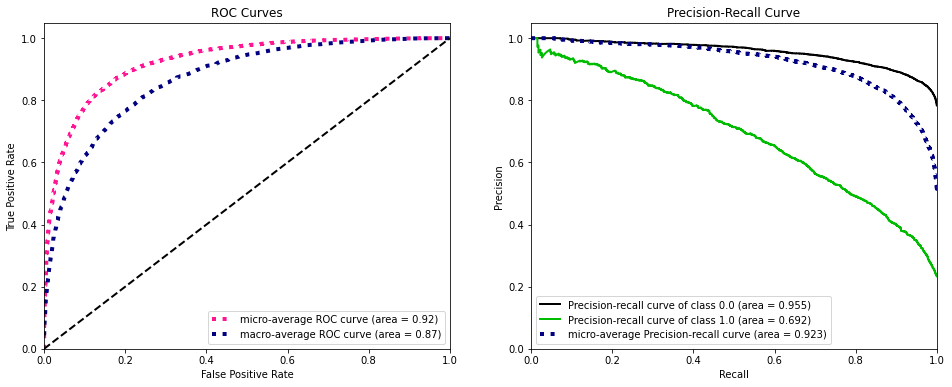

**************************************************
**************************************************
Results with threshold 4
Recall or Sensitivity : 0.5833
Precision : 0.6623
F-1 Score:  0.6202802184754215
ROC-AUC:  0.7497296281653576
PR-AUC:  nan


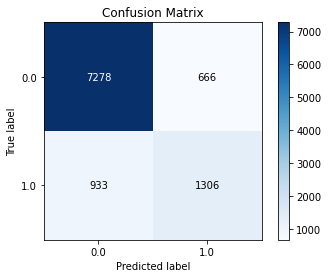

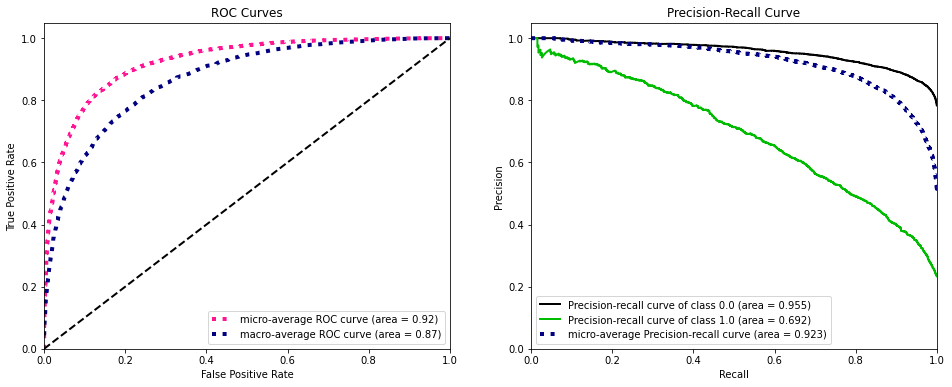

**************************************************


In [12]:
for i in range(1,5):

    cm1=0

    y_pred1 = best_model.predict_proba(X_valid)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold = i/10)


    print ("*"*50)
    print(f"Results with threshold {i/10}")
    show_metrics(y_valid, y_pred2, best_model.predict_proba(X_valid))
    print ("*"*50)

# Final Evaluation on Test set

Best threshold of our case is 0.2 to maximize ROC-AUC.

In [13]:
y_predict_proba_best_test = best_model.predict_proba(X_test)[:,1]
y_predict_proba_best_test = y_predict_proba_best_test.reshape(-1,1)
y_pred_binar_best_test = binarize(y_predict_proba_best_test, threshold = 0.2)

Recall or Sensitivity : 0.7890
Precision : 0.5055
F-1 Score:  0.6162010050251256
ROC-AUC:  0.7839851973735719
PR-AUC:  nan


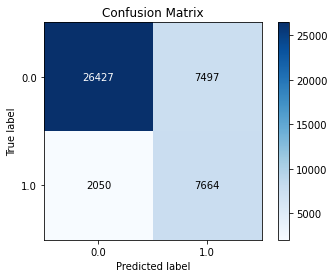

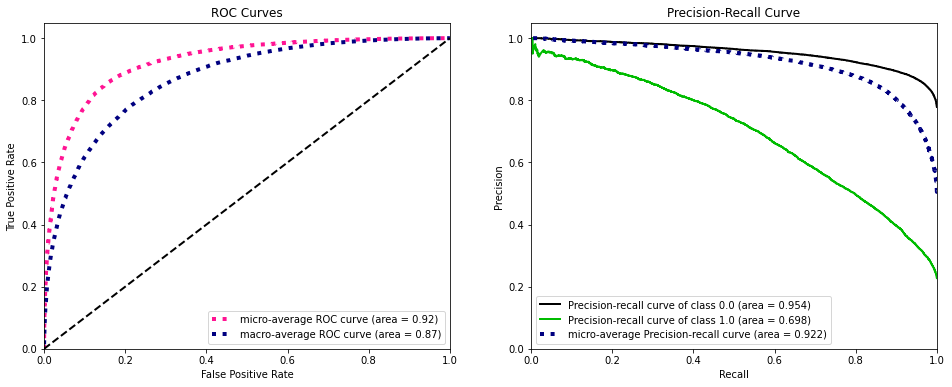

In [14]:
show_metrics(y_test, y_pred_binar_best_test, best_model.predict_proba(X_test))